In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

import os
import warnings



In [2]:
# Ignore all warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('data/modified_utc_dataset.csv')
print(data.head(4))

   Duration Protocol Direction State  Source_Type_of_Service  \
0  1.026539      tcp        ->  S_RA                     0.0   
1  1.009595      tcp        ->  S_RA                     0.0   
2  3.056586      tcp        ->  SR_A                     0.0   
3  3.111769      tcp        ->  SR_A                     0.0   

   Destination_Type_of_Service  Total_Packets  Total_Bytes  Source_Bytes  \
0                          0.0              4          276           156   
1                          0.0              4          276           156   
2                          0.0              3          182           122   
3                          0.0              3          182           122   

                                    Label  
0  flow=Background-Established-cmpgw-CVUT  
1  flow=Background-Established-cmpgw-CVUT  
2             flow=Background-TCP-Attempt  
3             flow=Background-TCP-Attempt  


In [4]:
# we have seen that our data has 10 columns
print(data.dtypes)

Duration                       float64
Protocol                        object
Direction                       object
State                           object
Source_Type_of_Service         float64
Destination_Type_of_Service    float64
Total_Packets                    int64
Total_Bytes                      int64
Source_Bytes                     int64
Label                           object
dtype: object


In [5]:
print(data.head(4).info)

<bound method DataFrame.info of    Duration Protocol Direction State  Source_Type_of_Service  \
0  1.026539      tcp        ->  S_RA                     0.0   
1  1.009595      tcp        ->  S_RA                     0.0   
2  3.056586      tcp        ->  SR_A                     0.0   
3  3.111769      tcp        ->  SR_A                     0.0   

   Destination_Type_of_Service  Total_Packets  Total_Bytes  Source_Bytes  \
0                          0.0              4          276           156   
1                          0.0              4          276           156   
2                          0.0              3          182           122   
3                          0.0              3          182           122   

                                    Label  
0  flow=Background-Established-cmpgw-CVUT  
1  flow=Background-Established-cmpgw-CVUT  
2             flow=Background-TCP-Attempt  
3             flow=Background-TCP-Attempt  >


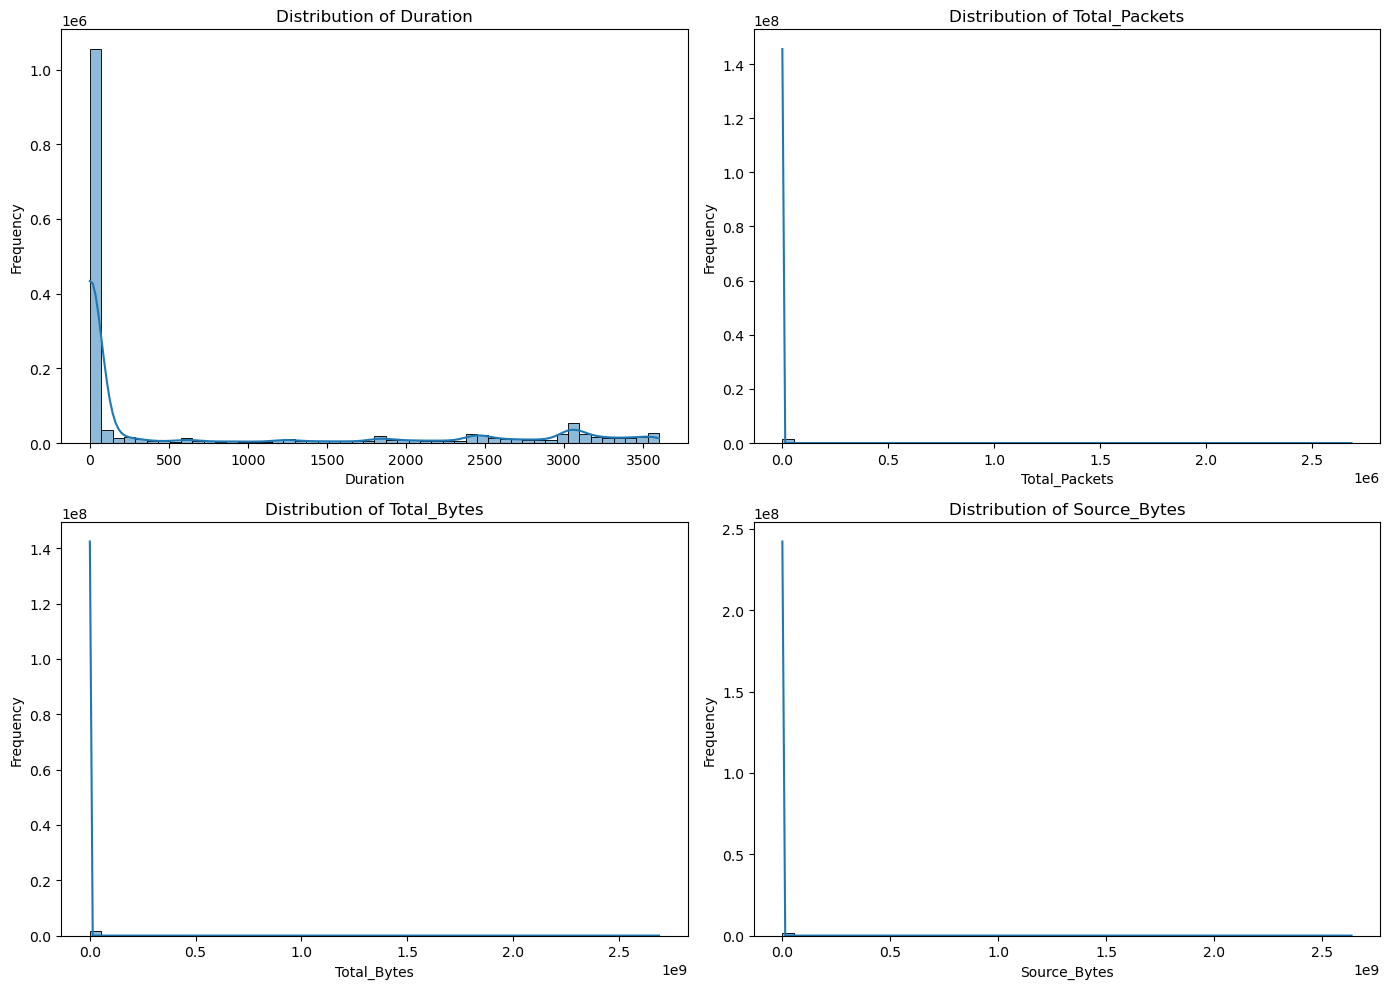

In [6]:
# List of columns to visualize
columns_to_visualize = ['Duration', 'Total_Packets', 'Total_Bytes', 'Source_Bytes']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(columns_to_visualize):
    sns.histplot(data[col], bins=50, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


The distribution of all features suggests that the data is rightly skewed. Those features might also correlate with one another since the duration of someone's internet usage affects the total packets and also the total bytes. 


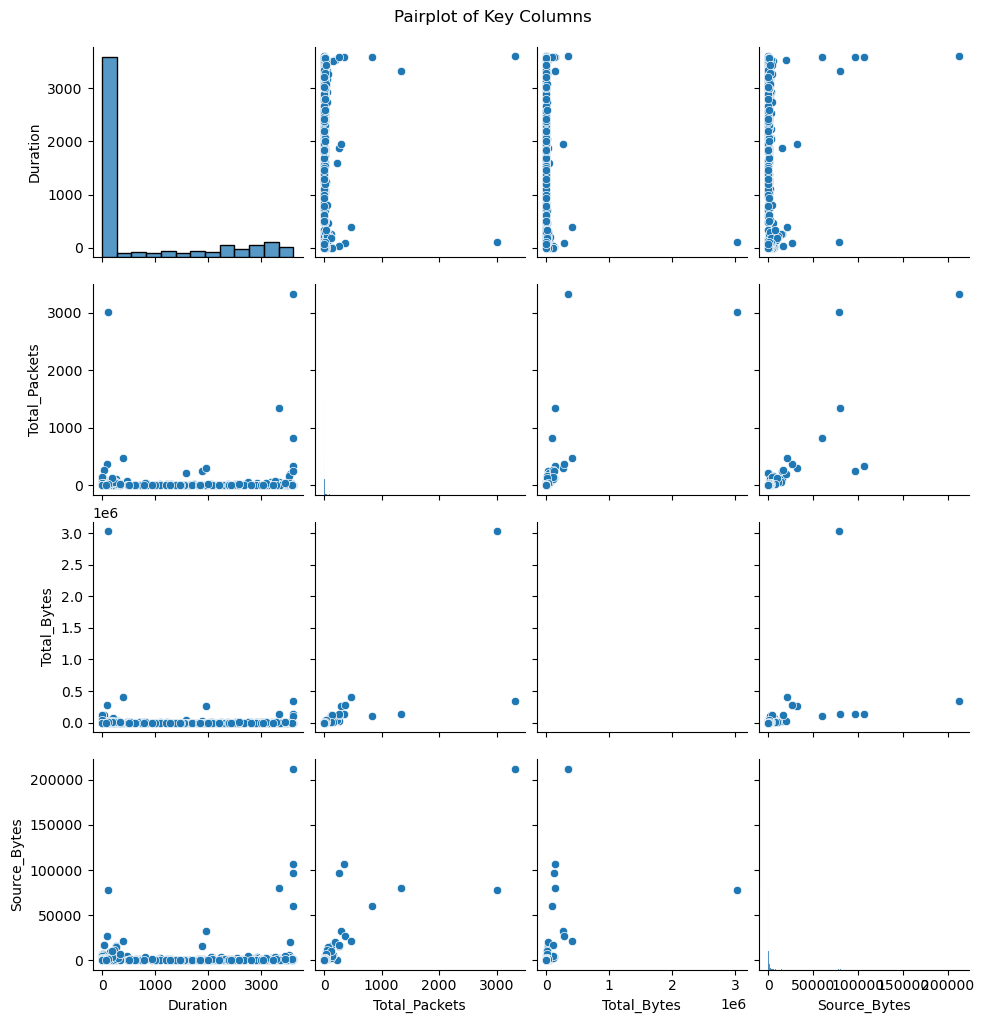

In [7]:
sampled_data = data.sample(n=1000, random_state=42)

sns.pairplot(sampled_data[columns_to_visualize])
plt.suptitle('Pairplot of Key Columns', y=1.02)
plt.show()


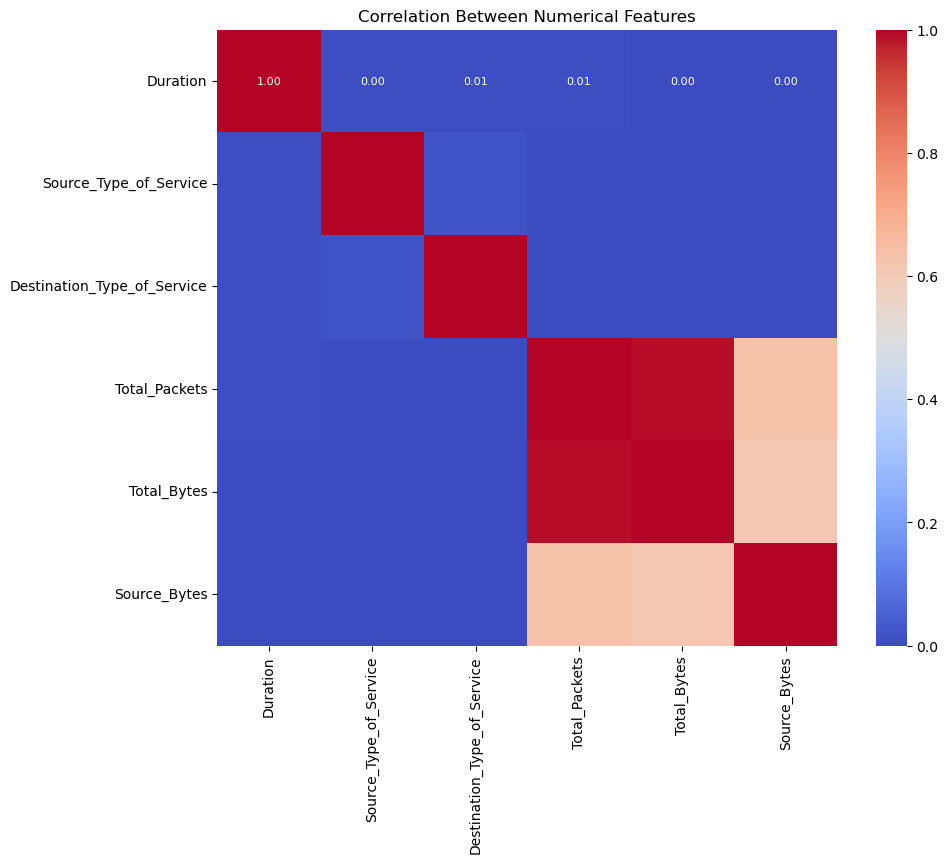

In [11]:
numerical_df = data.select_dtypes(include=['float64', 'int64'])
corr_matrix = numerical_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})
plt.title('Correlation Between Numerical Features')
plt.show()


From the correlation histogram, we found out that only total packet, total bytes, and source bytes have a correlation. The duration, the destination and the source had zero correlation which is important for building a model. 

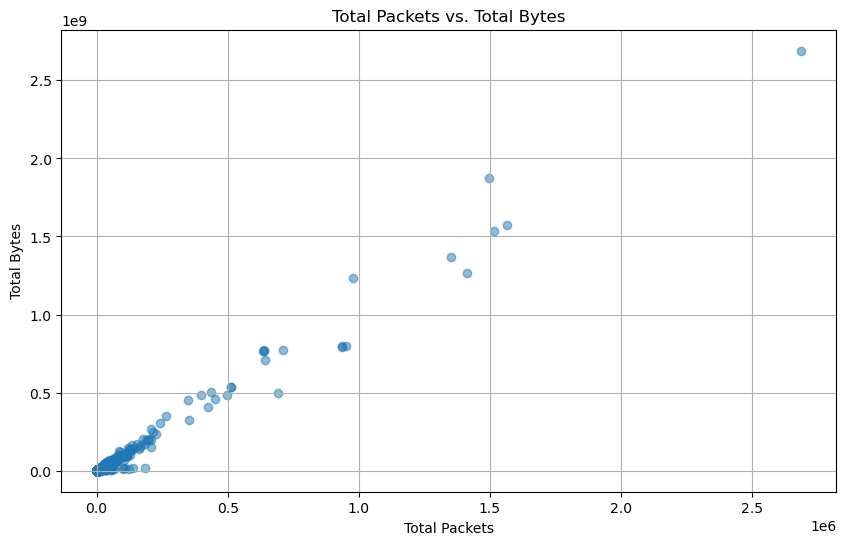

In [9]:
# Plot total packets vs. total bytes
plt.figure(figsize=(10, 6))
plt.scatter(data['Total_Packets'], data['Total_Bytes'], alpha=0.5)
plt.title('Total Packets vs. Total Bytes')
plt.xlabel('Total Packets')
plt.ylabel('Total Bytes')
plt.grid(True)
plt.show()


# Relation between catagorical variables and numerical variables 

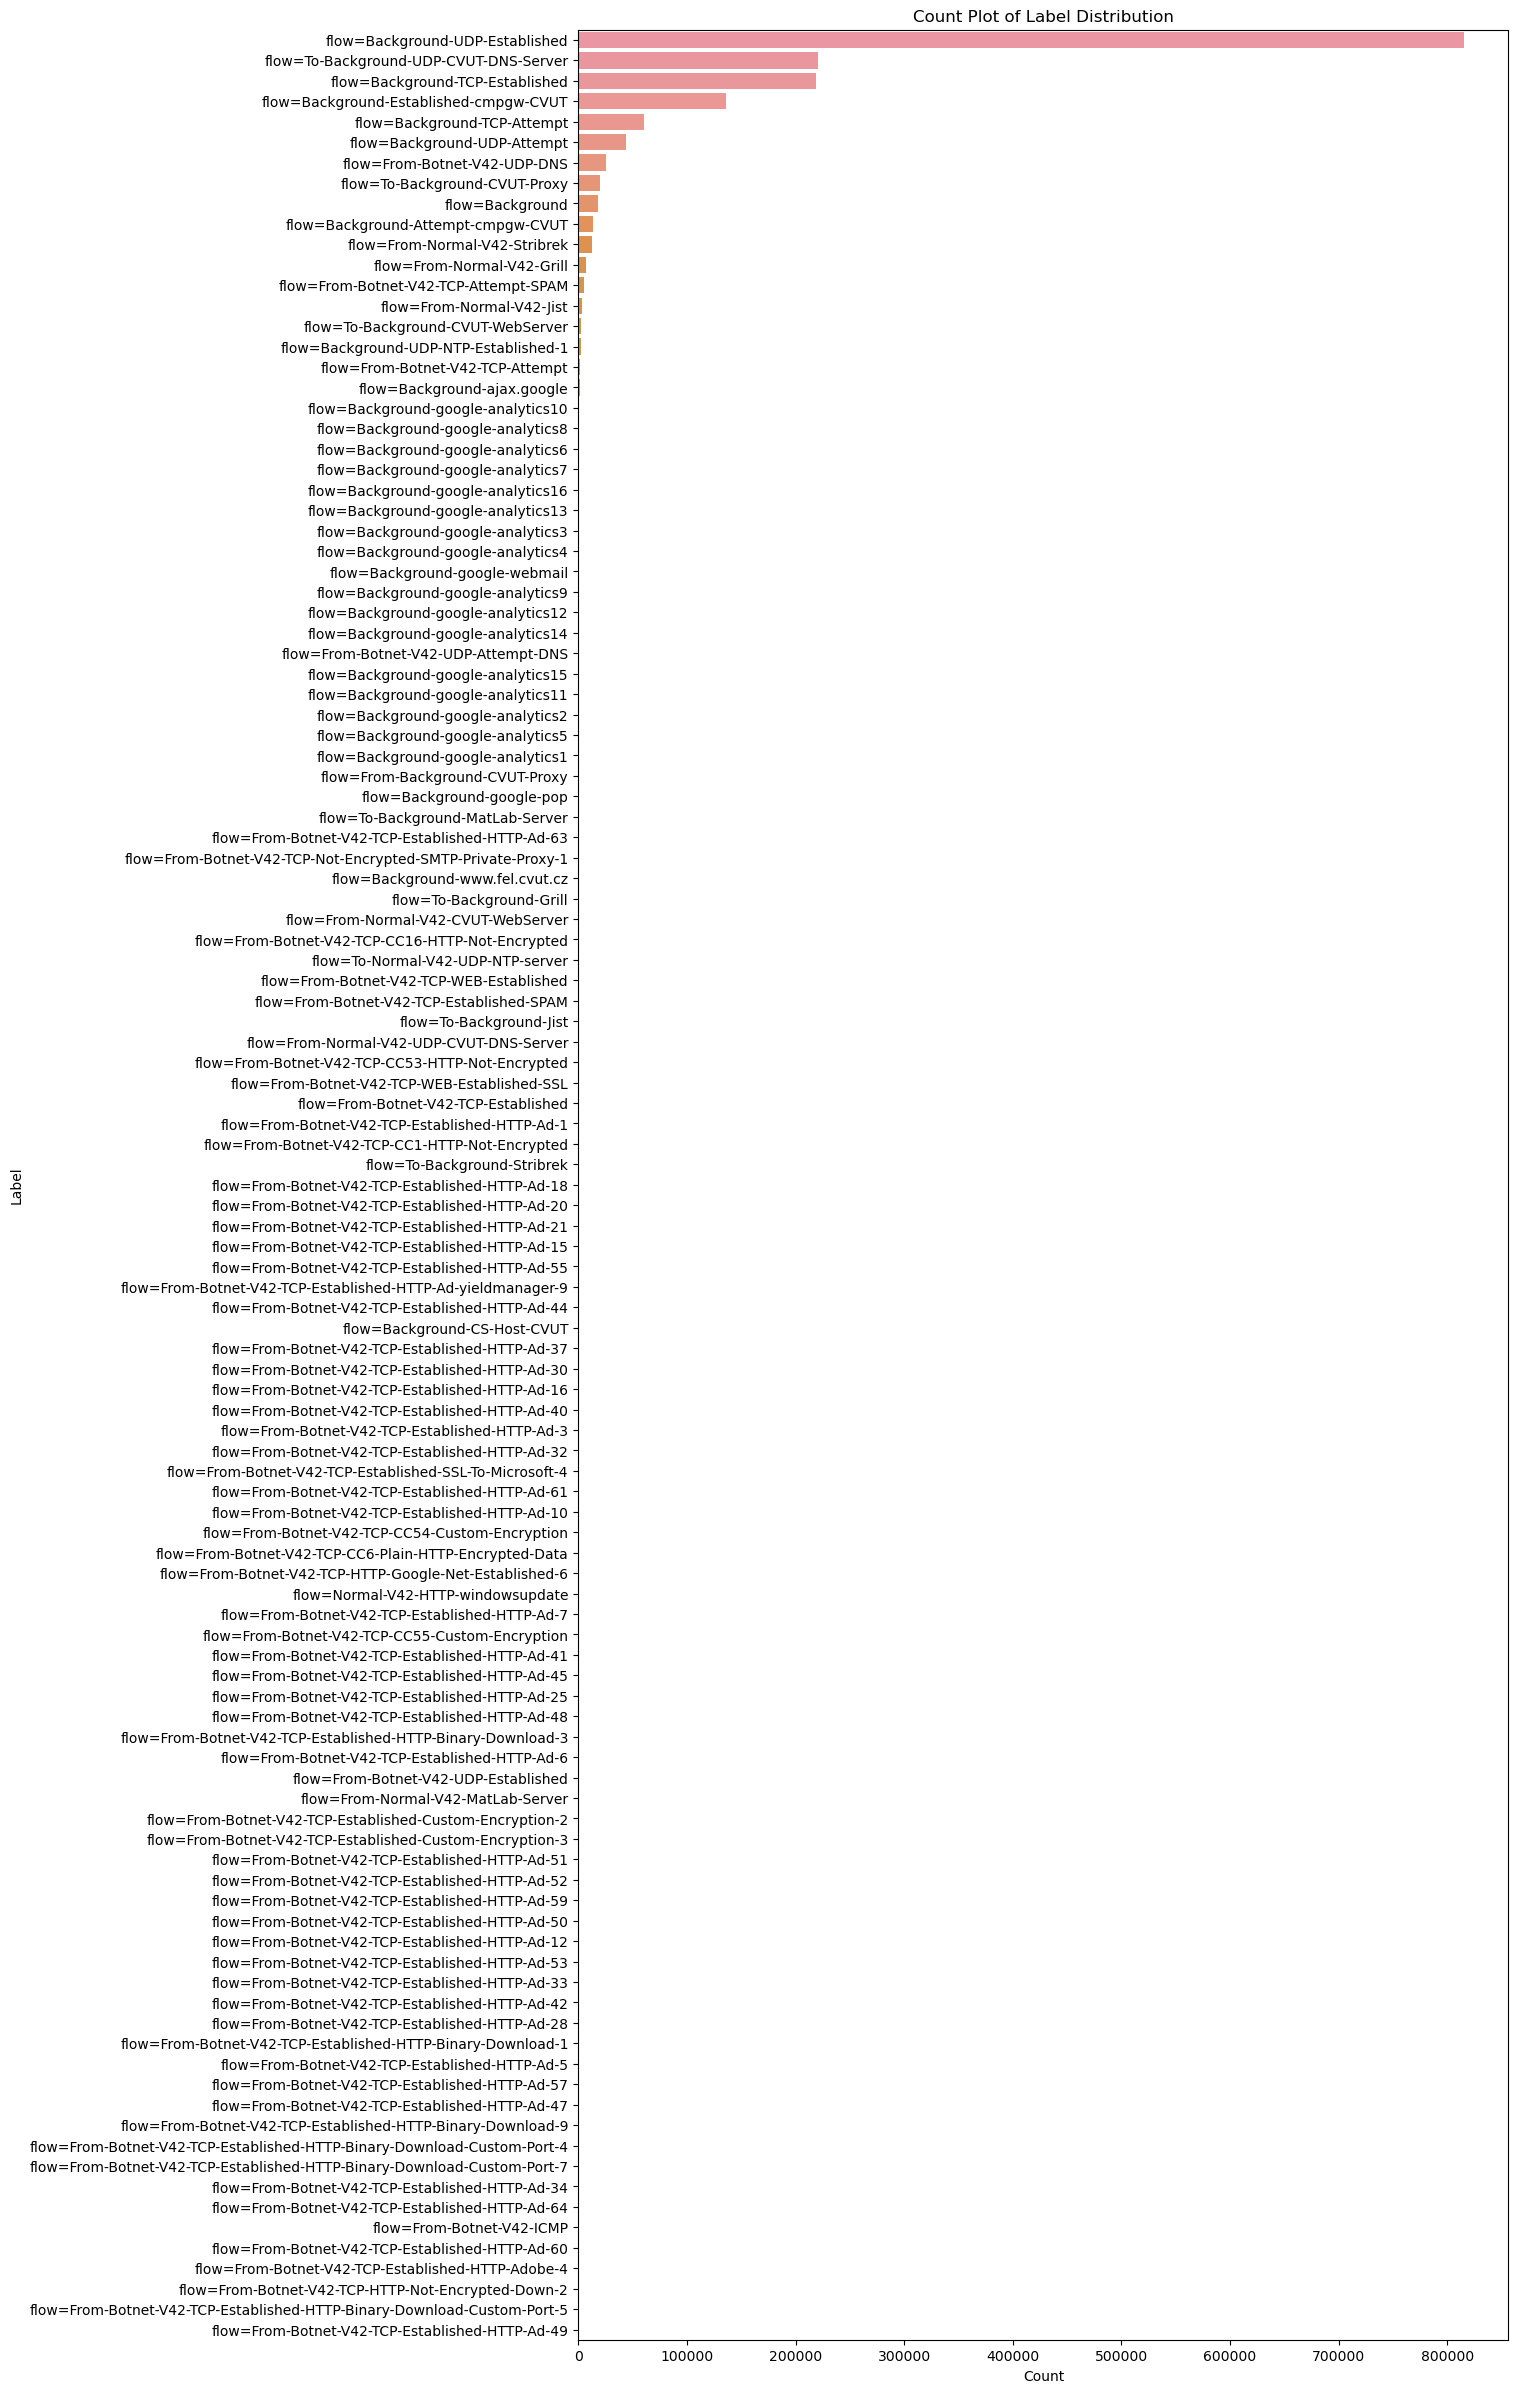

In [21]:
# Create count plot
plt.figure(figsize=(12, 30))
sns.countplot(y='Label', data=data, order=label_counts.index)
plt.title('Count Plot of Label Distribution')
plt.xlabel('Count')
plt.ylabel('Label')
plt.show()

In [24]:
data['Suspicious'] = data['Label'].apply(lambda x: 1 if 'flow=From-Botnet' in x else 0)

# Aggregate the data based on the 'Suspicious' column
suspicious_counts = data['Suspicious'].value_counts()

# Print the number of observations for each category
print(suspicious_counts)

# Display the first few rows of the dataframe to verify the 'Suspicious' column
data.head()

Suspicious
0    1587187
1      33986
Name: count, dtype: int64


,Duration,Protocol,Direction,State,Source_Type_of_Service,Destination_Type_of_Service,Total_Packets,Total_Bytes,Source_Bytes,Label,Suspicious
0,1.026539,tcp,->,S_RA,0.0,0.0,4,276,156,flow=Background-Established-cmpgw-CVUT,0
1,1.009595,tcp,->,S_RA,0.0,0.0,4,276,156,flow=Background-Established-cmpgw-CVUT,0
2,3.056586,tcp,->,SR_A,0.0,0.0,3,182,122,flow=Background-TCP-Attempt,0
3,3.111769,tcp,->,SR_A,0.0,0.0,3,182,122,flow=Background-TCP-Attempt,0
4,3.083411,tcp,->,SR_A,0.0,0.0,3,182,122,flow=Background-TCP-Attempt,0


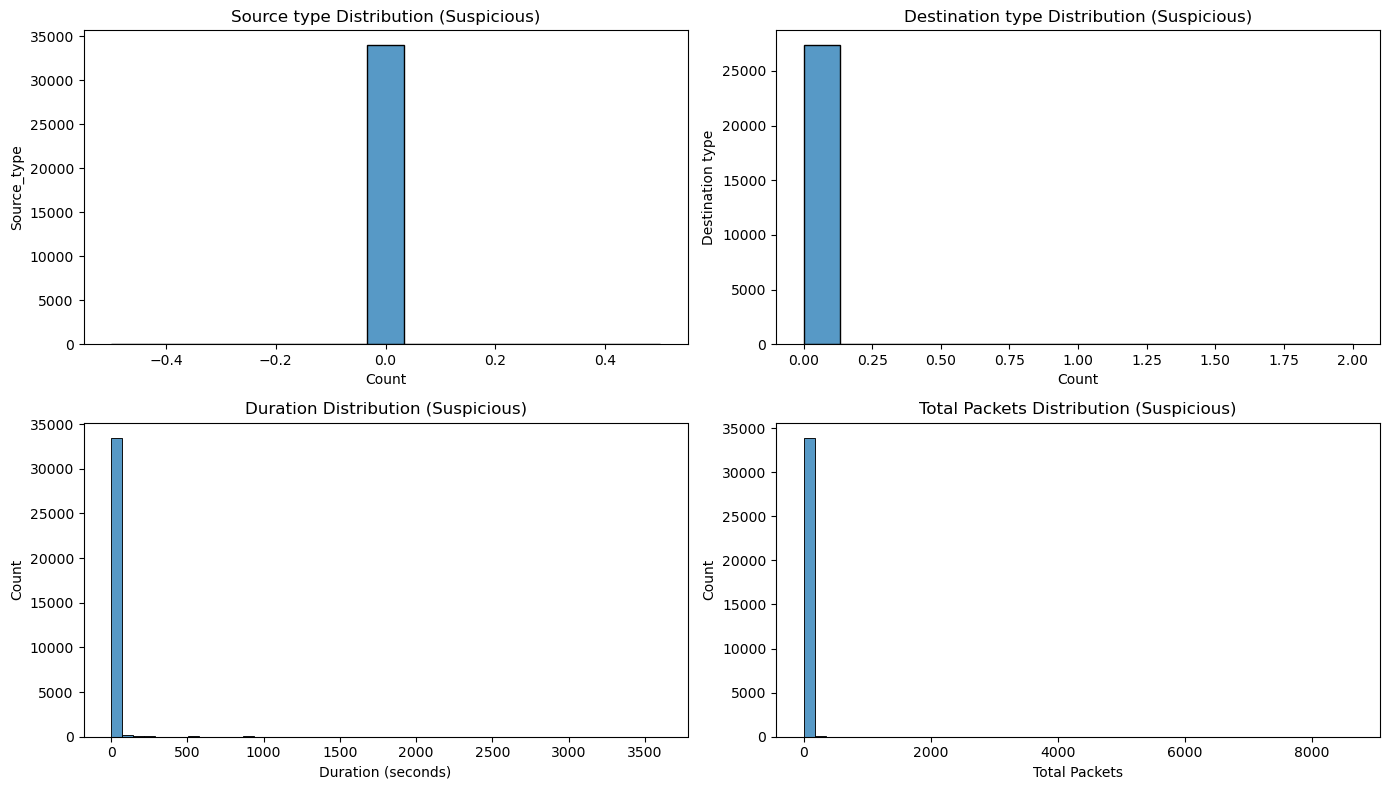

In [44]:
# Filter the data where Suspicious = 
suspicious_df = data[data['Suspicious'] == 1]

# Plot settings
plt.figure(figsize=(14, 8))

# Horizontal bar plot for 'State'
plt.subplot(2, 2, 1)
sns.histplot(suspicious_df['Source_Type_of_Service'], bins =15, kde=False)
plt.title('Source type Distribution (Suspicious)')
plt.xlabel('Count')
plt.ylabel('Source_type')

# Horizontal bar plot for 'Direction'
plt.subplot(2, 2, 2)
sns.histplot(suspicious_df['Destination_Type_of_Service'], bins =15, kde =False)
plt.title('Destination type Distribution (Suspicious)')
plt.xlabel('Count')
plt.ylabel('Destination type')

# Horizontal bar plot for 'Duration'
plt.subplot(2, 2, 3)
sns.histplot(suspicious_df['Duration'], bins=50, kde=False)
plt.title('Duration Distribution (Suspicious)')
plt.xlabel('Duration (seconds)')
plt.ylabel('Count')

# Horizontal bar plot for 'Total_Packets'
plt.subplot(2, 2, 4)
sns.histplot(suspicious_df['Total_Packets'], bins=50, kde=False)
plt.title('Total Packets Distribution (Suspicious)')
plt.xlabel('Total Packets')
plt.ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()


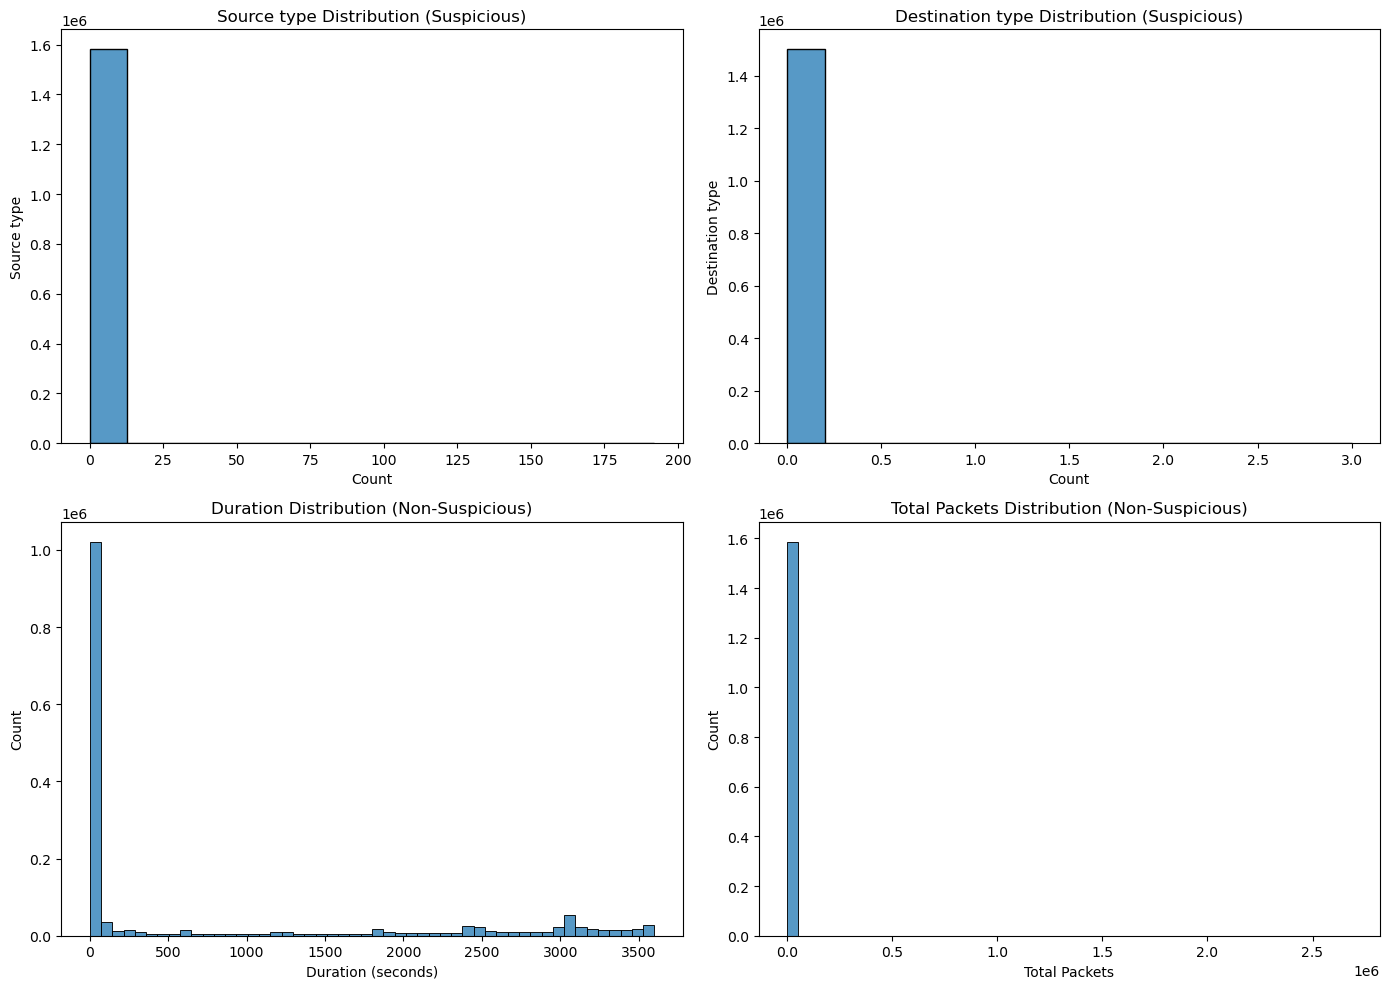

In [45]:
# Filter the data where Suspicious = 0
non_suspicious_df = data[data['Suspicious'] == 0]
# Plot settings
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.histplot(non_suspicious_df['Source_Type_of_Service'], bins =15, kde=False)
plt.title('Source type Distribution (Suspicious)')
plt.xlabel('Count')
plt.ylabel('Source type')

# Horizontal bar plot for 'Direction'
plt.subplot(2, 2, 2)
sns.histplot(non_suspicious_df['Destination_Type_of_Service'], bins =15, kde =False)
plt.title('Destination type Distribution (Suspicious)')
plt.xlabel('Count')
plt.ylabel('Destination type')

# Histogram for 'Duration' for non-suspicious data
plt.subplot(2, 2, 3)
sns.histplot(non_suspicious_df['Duration'], bins=50, kde=False)
plt.title('Duration Distribution (Non-Suspicious)')
plt.xlabel('Duration (seconds)')
plt.ylabel('Count')

# Histogram for 'Total_Packets' for non-suspicious data
plt.subplot(2, 2, 4)
sns.histplot(non_suspicious_df['Total_Packets'], bins=50, kde=False)
plt.title('Total Packets Distribution (Non-Suspicious)')
plt.xlabel('Total Packets')
plt.ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()


In [52]:
# Function to calculate top N states by percentage and add 'Other' category
def top_n_percentage_states_with_other(c =column, df, n=10):
    state_counts = df[c].value_counts(normalize=True) * 100
    top_n_states = state_counts.nlargest(n)
    other_percentage = state_counts.iloc[n:].sum()
    top_n_states_with_other = pd.concat([top_n_states, pd.Series({'Other': other_percentage})])
    return top_n_states_with_other

# Get top 10 percentage states with 'Other' for suspicious data
top_10_states_suspicious_with_other = top_n_percentage_states_with_other('State', suspicious_df, 10)
top_10_states_non_suspicious_with_other = top_n_percentage_states_with_other('State', non_suspicious_df, 10)
top_5_direction_suspicious_with_other = top_n_percentage_states_with_other('Direction', suspicious_df, 10)
top_5_direction_non_suspicious_with_other = top_n_percentage_states_with_other('Direction', non_suspicious_df, 10)



# Plot settings
plt.figure(figsize=(14, 6))

# Horizontal bar plot for top 10 percentage states (Suspicious) with 'Other'
plt.subplot(2, 2, 1)
sns.barplot(x=top_10_states_suspicious_with_other.values, y=top_10_states_suspicious_with_other.index, palette='viridis')
plt.title('Top 10 Percentage States (Suspicious) with "Other"')
plt.xlabel('Percentage')
plt.ylabel('State')
for i, value in enumerate(top_10_states_suspicious_with_other.values):
    plt.text(value, i, f'{value:.2f}%', va='center', ha='right', color='white')

# Horizontal bar plot for top 10 percentage states (Non-Suspicious) with 'Other'
plt.subplot(2, 2, 2)
sns.barplot(x=top_10_states_non_suspicious_with_other.values, y=top_10_states_non_suspicious_with_other.index, palette='viridis')
plt.title('Top 10 Percentage States (Non-Suspicious) with "Other"')
plt.xlabel('Percentage')
plt.ylabel('State')
for i, value in enumerate(top_10_states_non_suspicious_with_other.values):
    plt.text(value, i, f'{value:.2f}%', va='center', ha='right', color='white')

plt.subplot(2, 2, 3)
sns.barplot(x=top_10_states_suspicious_with_other.values, y=top_5_direction_suspicious_with_other.index, palette='viridis')
plt.title('Top 10 Percentage Direction (Suspicious) with "Other"')
plt.xlabel('Percentage')
plt.ylabel('Direction')
for i, value in enumerate(top_10_states_suspicious_with_other.values):
    plt.text(value, i, f'{value:.2f}%', va='center', ha='right', color='white')

# Horizontal bar plot for top 10 percentage states (Non-Suspicious) with 'Other'
plt.subplot(2, 2, 4)
sns.barplot(x=top_10_states_non_suspicious_with_other.values, y=top_5_direction_non_suspicious_with_other.index, palette='viridis')
plt.title('Top 10 Percentage Direction (Non-Suspicious) with "Other"')
plt.xlabel('Percentage')
plt.ylabel('Direction')
for i, value in enumerate(top_10_states_non_suspicious_with_other.values):
    plt.text(value, i, f'{value:.2f}%', va='center', ha='right', color='white')

# Adjust layout
plt.tight_layout()
plt.show()


SyntaxError: non-default argument follows default argument (30729571.py, line 2)

In [38]:
# Function to create countplot
def create_countplot(data, column, title):
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=data, palette='viridis')
    plt.title(title)
    plt.xlabel('Count')
    plt.ylabel(column)
    plt.show()

# Function to create histplot
def create_histplot(data, column, title):
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column], bins=50, kde=False)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

# Features to plot
features = ['Source', 'Destination', 'Source_Bytes']

# Plotting
for feature in features:
    create_histplot(suspicious_df, feature, f'Top 5 {feature} (Suspicious)')
    create_histplot(non_suspicious_df, feature, f'Top 5 {feature} (Non-Suspicious)')

# Additional plots for State and Protocol
create_countplot(suspicious_df, 'State', 'Top 6 States (Suspicious)')
create_countplot(non_suspicious_df, 'State', 'Top 6 States (Non-Suspicious)')
create_countplot(suspicious_df, 'Protocol', 'Top 5 Protocols (Suspicious)')
create_countplot(non_suspicious_df, 'Protocol', 'Top 5 Protocols (Non-Suspicious)')


KeyError: 'Source'

<Figure size 800x600 with 0 Axes>

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to create countplot
def create_countplot(data, column, title):
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=data, palette='viridis')
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

# Function to create histplot
def create_histplot(data, column, title):
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column], bins=50, kde=False)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

# Features to plot countplots for
numerical_features = ['Source', 'Destination', 'Total_Packets', 'Total_Bytes']

# Plotting countplots for numerical features
for feature in numerical_features:
    create_countplot(suspicious_df, feature, f'Count Plot of {feature} (Suspicious)')
    create_countplot(non_suspicious_df, feature, f'Count Plot of {feature} (Non-Suspicious)')

# Plotting histplots for State and Protocol
create_histplot(suspicious_df, 'State', 'Histogram of States (Suspicious)')
create_histplot(non_suspicious_df, 'State', 'Histogram of States (Non-Suspicious)')
create_histplot(suspicious_df, 'Protocol', 'Histogram of Protocols (Suspicious)')
create_histplot(non_suspicious_df, 'Protocol', 'Histogram of Protocols (Non-Suspicious)')



ValueError: Could not interpret input 'Source'

<Figure size 800x600 with 0 Axes>

# Initial Observations

1. **Data Structure**: The dataset contains 10 columns and each column appears to be relevant for network traffic analysis.
2. **Missing Values**: There are no missing values in the dataset, indicating data completeness.
3. **Data Types**: The data types of each column are appropriate, with numerical columns correctly identified.
4. **Distribution of Key Columns**:
   - The 'Duration' column has a right-skewed distribution, indicating most flows are short-lived.
   - The 'Total_Packets' and 'Total_Bytes' columns also show right-skewed distributions.
5. **Categorical Columns**: 
   - The 'Protocol' column is dominated by TCP traffic.
   - The 'State' column shows various network states with some states being more common.
6. **Correlation**: The correlation matrix reveals relationships between numerical columns, with some columns showing strong correlations (e.g., 'Total_Packets' and 'Total_Bytes').

Further exploration and analysis will help in identifying patterns and potential anomalies in the network traffic data.
